In [1]:
import pandas as pd
import understatapi

client = understatapi.UnderstatClient()

In [2]:

# Let's first get data from a league to retrieve a list of matches
league_data = client.league(league="Bundesliga").get_match_data(season="2024")
league_data[6]

{'id': '27748',
 'isResult': True,
 'h': {'id': '129', 'title': 'Borussia Dortmund', 'short_title': 'DOR'},
 'a': {'id': '132', 'title': 'Eintracht Frankfurt', 'short_title': 'EIN'},
 'goals': {'h': '2', 'a': '0'},
 'xG': {'h': '1.9263', 'a': '1.15188'},
 'datetime': '2024-08-24 16:30:00',
 'forecast': {'w': '0.5722', 'd': '0.2791', 'l': '0.1487'}}

In [3]:
# now we can use the match id to get the match data
shot_data = client.match(match=league_data[6]["id"]).get_shot_data()
shot_data['a'][5]

{'id': '586333',
 'minute': '56',
 'result': 'SavedShot',
 'X': '0.8690000152587891',
 'Y': '0.6819999694824219',
 'xG': '0.043867647647857666',
 'player': 'Omar Marmoush',
 'h_a': 'a',
 'player_id': '8393',
 'situation': 'OpenPlay',
 'season': '2024',
 'shotType': 'LeftFoot',
 'match_id': '27748',
 'h_team': 'Borussia Dortmund',
 'a_team': 'Eintracht Frankfurt',
 'h_goals': '2',
 'a_goals': '0',
 'date': '2024-08-24 16:30:00',
 'player_assisted': 'Farès Chaïbi',
 'lastAction': 'Chipped'}

In [4]:
# now let's get all of the data for a player, with this method you need to use the player_id
# This is literally every shot they ever took.

player_data = client.player(player='8393').get_shot_data()
player_data[0]

{'id': '363407',
 'minute': '85',
 'result': 'SavedShot',
 'X': '0.9780000305175781',
 'Y': '0.3120000076293945',
 'xG': '0.06925970315933228',
 'player': 'Omar Marmoush',
 'h_a': 'a',
 'player_id': '8393',
 'situation': 'OpenPlay',
 'season': '2019',
 'shotType': 'RightFoot',
 'match_id': '12654',
 'h_team': 'Bayer Leverkusen',
 'a_team': 'Wolfsburg',
 'h_goals': '1',
 'a_goals': '4',
 'date': '2020-05-26 18:30:00',
 'player_assisted': 'Wout Weghorst',
 'lastAction': 'Pass'}

In [5]:
marmouch_df = pd.DataFrame(player_data)

In [6]:
marmouch_df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,363407,85,SavedShot,0.9780000305175781,0.3120000076293945,0.06925970315933228,Omar Marmoush,a,8393,OpenPlay,2019,RightFoot,12654,Bayer Leverkusen,Wolfsburg,1,4,2020-05-26 18:30:00,Wout Weghorst,Pass
1,425684,92,MissedShots,0.7169999694824218,0.8569999694824219,0.14448100328445435,Omar Marmoush,h,8393,OpenPlay,2021,RightFoot,17521,Wolfsburg,Bochum,1,0,2021-08-14 13:30:00,None,None
2,454261,16,SavedShot,0.9640000152587891,0.6580000305175782,0.27575400471687317,Omar Marmoush,a,8393,OpenPlay,2021,RightFoot,17549,Eintracht Frankfurt,VfB Stuttgart,1,1,2021-09-12 13:30:00,Philipp Klement,TakeOn
3,454269,50,MissedShots,0.955999984741211,0.3120000076293945,0.06032799929380417,Omar Marmoush,a,8393,OpenPlay,2021,RightFoot,17549,Eintracht Frankfurt,VfB Stuttgart,1,1,2021-09-12 13:30:00,Roberto Massimo,BallTouch
4,454273,75,BlockedShot,0.879000015258789,0.36,0.0799356997013092,Omar Marmoush,a,8393,OpenPlay,2021,RightFoot,17549,Eintracht Frankfurt,VfB Stuttgart,1,1,2021-09-12 13:30:00,Atakan Karazor,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,599975,71,BlockedShot,0.7319999694824219,0.5359999847412109,0.05582186579704285,Omar Marmoush,h,8393,DirectFreekick,2024,RightFoot,27817,Eintracht Frankfurt,Bochum,7,2,2024-11-02 14:30:00,None,Standard
214,602239,3,MissedShots,0.8930000305175781,0.34400001525878904,0.2839406132698059,Omar Marmoush,a,8393,OpenPlay,2024,RightFoot,27823,VfB Stuttgart,Eintracht Frankfurt,2,3,2024-11-10 16:30:00,Tuta,Chipped
215,602246,43,BlockedShot,0.8590000152587891,0.325,0.04720120504498482,Omar Marmoush,a,8393,OpenPlay,2024,RightFoot,27823,VfB Stuttgart,Eintracht Frankfurt,2,3,2024-11-10 16:30:00,None,None
216,602252,61,Goal,0.715999984741211,0.6809999847412109,0.036786939948797226,Omar Marmoush,a,8393,DirectFreekick,2024,RightFoot,27823,VfB Stuttgart,Eintracht Frankfurt,2,3,2024-11-10 16:30:00,None,Standard


In [7]:
# Définir les dates de début et de fin pour le filtrage
start_date = '2024-08-01'
end_date = '2025-06-30'

# Filtrer le DataFrame entre les dates
filtered_df = marmouch_df[(marmouch_df['date'] >= start_date) & (marmouch_df['date'] <= end_date)]

# Afficher le DataFrame filtré
print(filtered_df)

         id minute       result                   X                    Y  \
177  586333     56    SavedShot  0.8690000152587891   0.6819999694824219   
178  589003      6  MissedShots   0.855999984741211                0.705   
179  589007     25  MissedShots   0.735999984741211   0.6409999847412109   
180  589010     45  MissedShots   0.830999984741211                 0.64   
181  589014     52  MissedShots  0.9269999694824219    0.669000015258789   
182  589016     55         Goal  0.9030000305175782                 0.62   
183  590615     18  MissedShots   0.769000015258789   0.5209999847412109   
184  590618     29         Goal  0.9690000152587891                 0.54   
185  590620     38    SavedShot  0.8880000305175781   0.5820000076293945   
186  590627     63    SavedShot  0.9540000152587891  0.35400001525878905   
187  590628     64    SavedShot                0.91  0.34200000762939453   
188  590629     64  BlockedShot                0.88   0.3220000076293945   
189  590633 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [9]:

filtered_df.reset_index(drop=True, inplace=True)

In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               41 non-null     object
 1   minute           41 non-null     object
 2   result           41 non-null     object
 3   X                41 non-null     object
 4   Y                41 non-null     object
 5   xG               41 non-null     object
 6   player           41 non-null     object
 7   h_a              41 non-null     object
 8   player_id        41 non-null     object
 9   situation        41 non-null     object
 10  season           41 non-null     object
 11  shotType         41 non-null     object
 12  match_id         41 non-null     object
 13  h_team           41 non-null     object
 14  a_team           41 non-null     object
 15  h_goals          41 non-null     object
 16  a_goals          41 non-null     object
 17  date             41 non-null     obje

In [11]:
# Changer les types de colonnes dans le DataFrame filtered_df
filtered_df['id'] = filtered_df['id'].astype(int)  # Changez à int
filtered_df['minute'] = filtered_df['minute'].astype(int)  # Changez à int
filtered_df['result'] = filtered_df['result'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['X'] = filtered_df['X'].astype(float)  # Changez à float
filtered_df['Y'] = filtered_df['Y'].astype(float)  # Changez à float
filtered_df['xG'] = filtered_df['xG'].astype(float)  # Changez à float
filtered_df['player'] = filtered_df['player'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['h_a'] = filtered_df['h_a'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['player_id'] = filtered_df['player_id'].astype(int)  # Changez à int
filtered_df['situation'] = filtered_df['situation'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['season'] = filtered_df['season'].astype(int)  # Changez à int
filtered_df['shotType'] = filtered_df['shotType'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['match_id'] = filtered_df['match_id'].astype(int)  # Changez à int
filtered_df['h_team'] = filtered_df['h_team'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['a_team'] = filtered_df['a_team'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['h_goals'] = filtered_df['h_goals'].astype(int)  # Changez à int
filtered_df['a_goals'] = filtered_df['a_goals'].astype(int)  # Changez à int
filtered_df['date'] = filtered_df['date'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['player_assisted'] = filtered_df['player_assisted'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['lastAction'] = filtered_df['lastAction'].astype(str)  # Assurez-vous que c'est un objet

C:\Users\HP\AppData\Local\Temp\ipykernel_12184\3004862032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['id'] = filtered_df['id'].astype(int)  # Changez à int
C:\Users\HP\AppData\Local\Temp\ipykernel_12184\3004862032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['minute'] = filtered_df['minute'].astype(int)  # Changez à int
C:\Users\HP\AppData\Local\Temp\ipykernel_12184\3004862032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [12]:

filtered_df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,586333,56,SavedShot,0.869,0.682,0.043868,Omar Marmoush,a,8393,OpenPlay,2024,LeftFoot,27748,Borussia Dortmund,Eintracht Frankfurt,2,0,2024-08-24 16:30:00,Farès Chaïbi,Chipped
1,589003,6,MissedShots,0.856,0.705,0.038766,Omar Marmoush,h,8393,OpenPlay,2024,LeftFoot,27756,Eintracht Frankfurt,Hoffenheim,3,1,2024-08-31 13:30:00,Hugo Ekitike,Pass
2,589007,25,MissedShots,0.736,0.641,0.018161,Omar Marmoush,h,8393,OpenPlay,2024,RightFoot,27756,Eintracht Frankfurt,Hoffenheim,3,1,2024-08-31 13:30:00,None,None
3,589010,45,MissedShots,0.831,0.640,0.066371,Omar Marmoush,h,8393,OpenPlay,2024,RightFoot,27756,Eintracht Frankfurt,Hoffenheim,3,1,2024-08-31 13:30:00,Niels Nkounkou,Pass
4,589014,52,MissedShots,0.927,0.669,0.093527,Omar Marmoush,h,8393,OpenPlay,2024,RightFoot,27756,Eintracht Frankfurt,Hoffenheim,3,1,2024-08-31 13:30:00,Hugo Ekitike,Pass
5,589016,55,Goal,0.903,0.620,0.328959,Omar Marmoush,h,8393,OpenPlay,2024,RightFoot,27756,Eintracht Frankfurt,Hoffenheim,3,1,2024-08-31 13:30:00,Mario Götze,Pass
6,590615,18,MissedShots,0.769,0.521,0.029357,Omar Marmoush,a,8393,OpenPlay,2024,RightFoot,27764,Wolfsburg,Eintracht Frankfurt,1,2,2024-09-14 13:30:00,Hugo Larsson,Pass
7,590618,29,Goal,0.969,0.540,0.964012,Omar Marmoush,a,8393,OpenPlay,2024,RightFoot,27764,Wolfsburg,Eintracht Frankfurt,1,2,2024-09-14 13:30:00,Hugo Ekitike,TakeOn
8,590620,38,SavedShot,0.888,0.582,0.120270,Omar Marmoush,a,8393,SetPiece,2024,Head,27764,Wolfsburg,Eintracht Frankfurt,1,2,2024-09-14 13:30:00,Niels Nkounkou,Cross
9,590627,63,SavedShot,0.954,0.354,0.304689,Omar Marmoush,a,8393,OpenPlay,2024,RightFoot,27764,Wolfsburg,Eintracht Frankfurt,1,2,2024-09-14 13:30:00,None,Rebound


In [13]:
filtered_df['X'] = filtered_df['X'] * 100
filtered_df['Y'] = filtered_df['Y'] * 100

C:\Users\HP\AppData\Local\Temp\ipykernel_12184\2869361486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['X'] = filtered_df['X'] * 100
C:\Users\HP\AppData\Local\Temp\ipykernel_12184\2869361486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Y'] = filtered_df['Y'] * 100


In [14]:
total_shots = filtered_df.shape[0]
total_goals = filtered_df[filtered_df['result'] == 'Goal'].shape[0]
total_xg = filtered_df['xG'].sum()
xg_per_shor = total_xg / total_shots
points_avg_distance = filtered_df['X'].mean()
actual_avg_distance = 120 - (filtered_df['X'] *1.2).mean()

In [15]:

actual_avg_distance

np.float64(16.55414652010289)

In [16]:

print(filtered_df['xG'].dtype)  # Vérifiez le type de xG
print(filtered_df['xG'].isnull().sum())  # Vérifiez les valeurs nulles


float64
0


In [17]:

background_color = '#0C0D0E'
# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = 'Arvo-Regular.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [18]:
pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

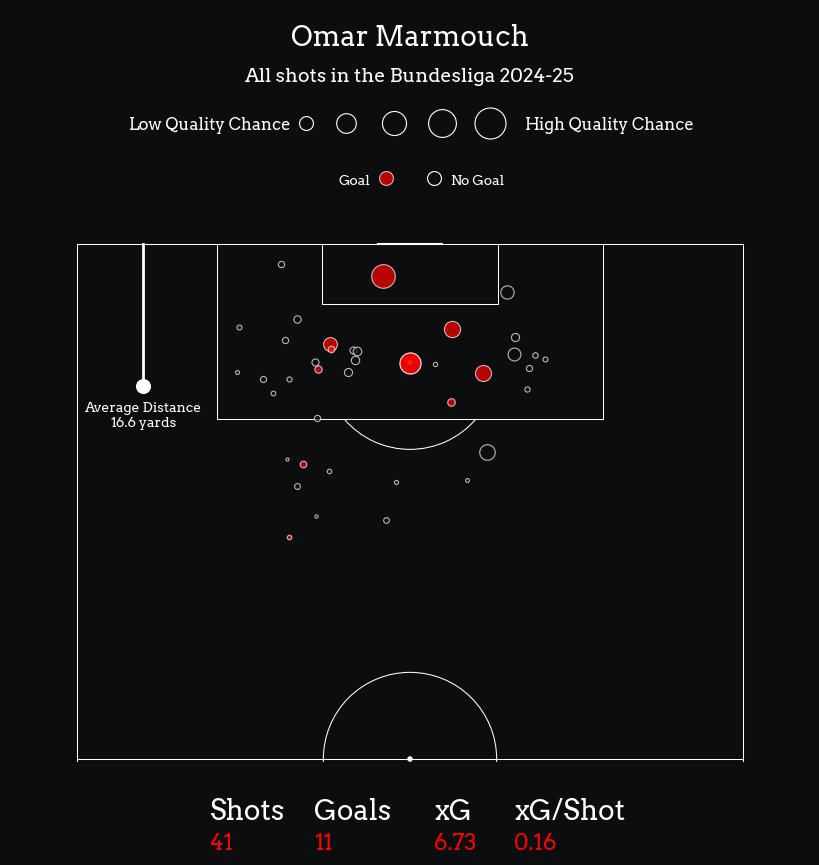

In [19]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5,
    y=.85,
    s='Omar Marmouch',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)
ax1.text(
    x=0.5,
    y=.7,
    s=f'All shots in the Bundesliga 2024-25',
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props,
    color='white',
    ha='center'
)
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90,
    y=points_avg_distance,
    s=100,
    color='white',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [100, points_avg_distance],
    color='white',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90,
    y=points_avg_distance - 4,
    s=f'Average Distance\n{actual_avg_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)

for x in filtered_df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )


ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.25,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.38,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.53,
    y=0,
    s=f'{total_xg:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.63,
    y=0,
    s=f'{xg_per_shor:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.set_axis_off()

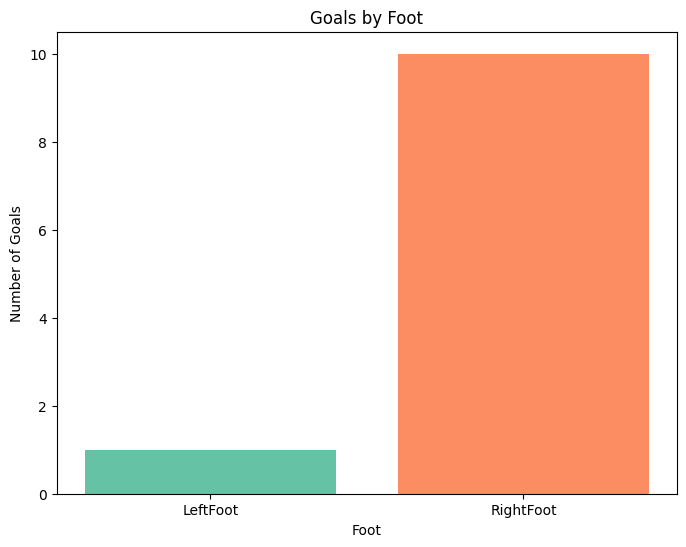

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of goals by foot
goals_by_foot = filtered_df[filtered_df['result'] == 'Goal'].groupby('shotType').size()


palette = sns.color_palette("Set2")

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(goals_by_foot.index, goals_by_foot.values, color=palette[:len(goals_by_foot)])
plt.title('Goals by Foot')
plt.xlabel('Foot')
plt.ylabel('Number of Goals')
# Save the plot as a PNG file
plt.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/marmouch_plots/goals_by_foot.png')

# Show plot
plt.show()


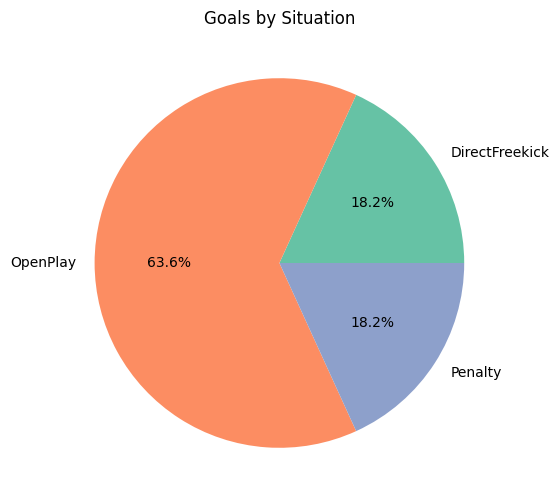

In [21]:
# Count the number of goals by situation
goals_by_situation = filtered_df[filtered_df['result'] == 'Goal'].groupby('situation').size()


palette = sns.color_palette("Set2")
# Plot pie chart
plt.figure(figsize=(8, 6))
goals_by_situation.plot(kind='pie', autopct='%1.1f%%', colors=palette[:len(goals_by_situation)])

plt.title('Goals by Situation')
plt.ylabel('')

# Save the plot as a PNG file
plt.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/marmouch_plots/goals_by_situation.png')


plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12184\2241256221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['opponent'] = filtered_df.apply(lambda row: row['a_team'] if row['h_team'] == 'Eintracht Frankfurt' else row['h_team'], axis=1)


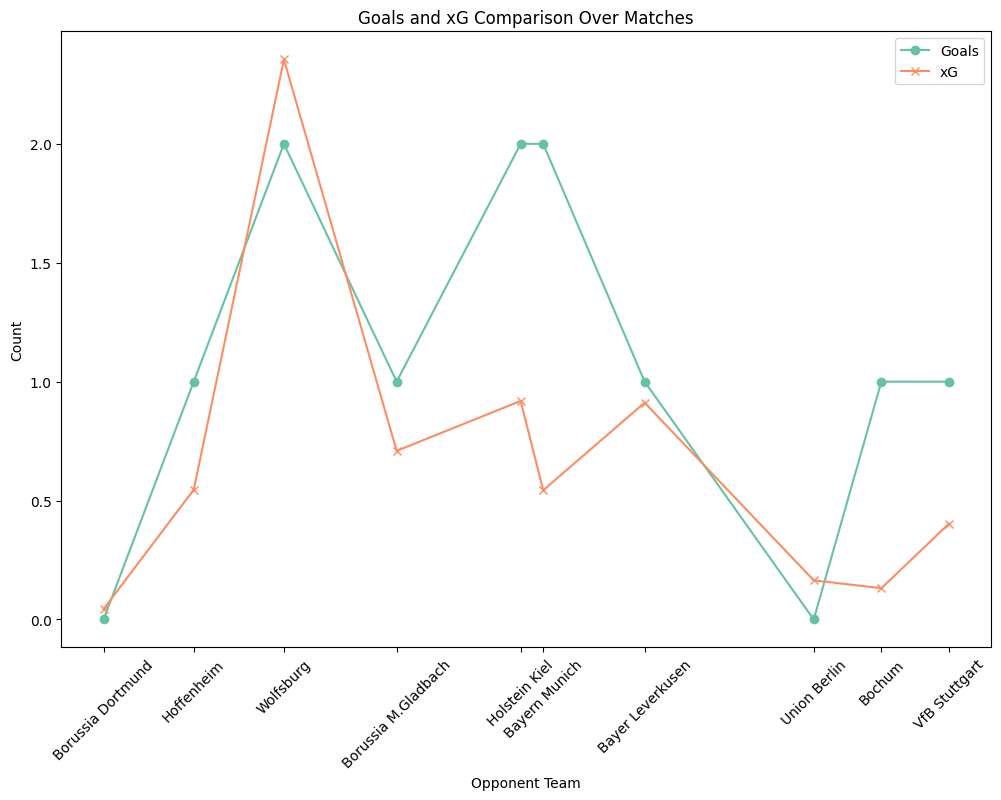

In [22]:

# Aggregate goals and xG by match
goals_xg_match = filtered_df.groupby('match_id').agg({'result': lambda x: (x == 'Goal').sum(), 'xG': 'sum'})

# Create a list of opponent teams based on the match_id
filtered_df['opponent'] = filtered_df.apply(lambda row: row['a_team'] if row['h_team'] == 'Eintracht Frankfurt' else row['h_team'], axis=1)

# Get the opponent teams
opponent_teams = filtered_df.groupby('match_id').first()['opponent']

# Set the Seaborn palette
palette = sns.color_palette("Set2")

# Plot line chart
plt.figure(figsize=(12, 8))
plt.plot(goals_xg_match.index, goals_xg_match['result'], label='Goals', marker='o', color=palette[0])
plt.plot(goals_xg_match.index, goals_xg_match['xG'], label='xG', marker='x', color=palette[1])
plt.title('Goals and xG Comparison Over Matches')

# Set x-axis labels as opponent teams
plt.xticks(ticks=goals_xg_match.index, labels=opponent_teams)

plt.xlabel('Opponent Team')
plt.ylabel('Count')
plt.legend()
# Set the x-axis ticks and labels to the opponent teams, spaced equally
plt.xticks(ticks=goals_xg_match.index, labels=opponent_teams, rotation=45)
# Save the plot as a PNG file
plt.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/marmouch_plots/goals_xg_match.png')
plt.show()


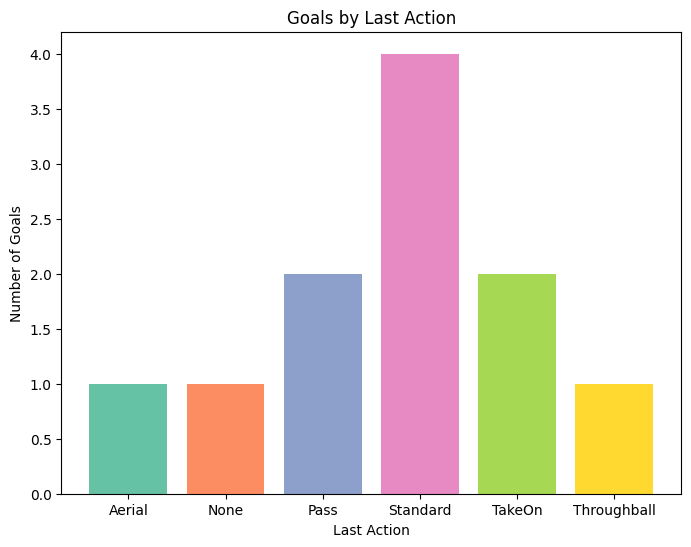

In [23]:
# Count the number of goals by last action
goals_by_last_action = filtered_df[filtered_df['result'] == 'Goal'].groupby('lastAction').size()


palette = sns.color_palette("Set2")
# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(goals_by_last_action.index, goals_by_last_action.values, color=palette[:len(goals_by_last_action)])
plt.title('Goals by Last Action')
plt.xlabel('Last Action')
plt.ylabel('Number of Goals')

# Save the plot as a PNG file
plt.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/marmouch_plots/goals_by_last_action.png')
plt.show()


In [24]:
filtered_df.to_csv('omar_marmouch_stats_2024.csv')

In [25]:
fig.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/marmouch_plots/Omar_Marmouch_2024.png', facecolor=background_color, bbox_inches='tight')
